# Taxi Fare Prediction

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Import Data

In [2]:
df = pd.read_csv("data/taxi_fare.csv", parse_dates=['pickup_datetime'])
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
df.shape

(18919, 7)

Data terdiri dari 18919 baris dan 7 kolom.

In [4]:
df.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

Tipe data telah sesuai.

,missing_value,%
fare_amount,0,0.00
pickup_datetime,0,0.00
pickup_longitude,0,0.00
pickup_latitude,0,0.00
dropoff_longitude,0,0.00
dropoff_latitude,0,0.00
passenger_count,1,0.01


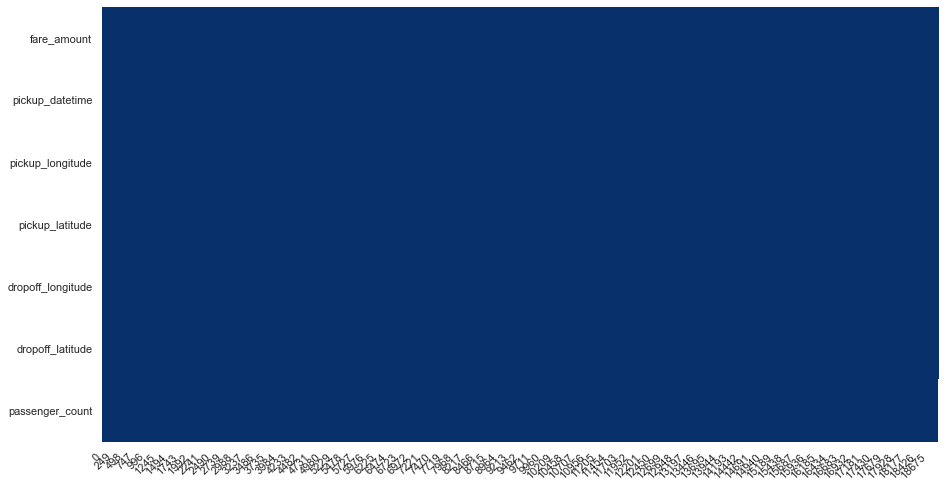

In [5]:
plot_missing_value(df, return_df=True)

In [6]:
df.dropna(inplace=True)

,missing_value,%
fare_amount,0,0.0
pickup_datetime,0,0.0
pickup_longitude,0,0.0
pickup_latitude,0,0.0
dropoff_longitude,0,0.0
dropoff_latitude,0,0.0
passenger_count,0,0.0


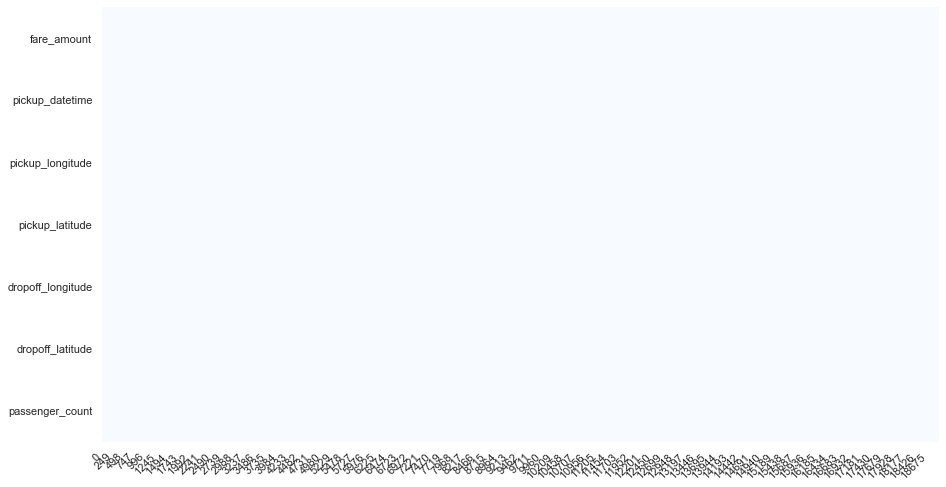

In [7]:
plot_missing_value(df, return_df=True)

Data telah bersih.

In [8]:
df.shape

(18918, 7)

## Extract Time Feature 

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
pickup_dt = df.pickup_datetime.dt

In [11]:
df['year'] = pickup_dt.year
df['month'] = pickup_dt.month
df['day'] = pickup_dt.dayofweek
df['hour'] = pickup_dt.hour
df.drop(columns='pickup_datetime', axis=1, inplace=True)

In [12]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,1,7


## Extract Distance Feature 

In [13]:
df['distance'] = np.abs(df.pickup_longitude - df.dropoff_longitude) + np.abs(df.pickup_latitude - df.dropoff_latitude) 
df.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1,
       inplace=True)

In [14]:
df.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009,6,0,17,0.011742
1,16.9,1.0,2010,1,1,16,0.107481
2,5.7,2.0,2011,8,3,0,0.019212
3,7.7,1.0,2012,4,5,4,0.029386
4,5.3,1.0,2010,3,1,7,0.027194


## Dataset Splitting 

In [15]:
X = df.drop(columns="fare_amount")
y = df.fare_amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15134, 6), (3784, 6), (15134,), (3784,))

## Modeling

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [17]:
gsp.linreg_params

{'algo__fit_intercept': [True, False]}

In [18]:
X_train.head()

,passenger_count,year,month,day,hour,distance
7539,1.0,2011,6,1,22,0.000000
578,3.0,2010,3,3,10,0.009293
8056,5.0,2010,4,0,8,0.048951
11761,1.0,2014,11,0,22,0.027145
15531,1.0,2012,12,5,13,0.010498


In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['passenger_count','year','distance']),
    ('categoric', cat_pipe(encoder='onehot'), ['month','day','hour']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])


model = GridSearchCV(pipeline, gsp.linreg_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__fit_intercept': False}
0.02308672766091535 0.01607015369875837 0.019171005161279675


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.0s finished


## Tambahkan Poly

In [20]:
gsp.linreg_poly_params

{'prep__numeric__poly__degree': [1, 2, 3],
 'prep__numeric__poly__interaction_only': [True, False],
 'algo__fit_intercept': [True, False]}

In [21]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2), ['passenger_count','year','distance']),
    ('categoric', cat_pipe(encoder='onehot'), ['month','day','hour']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])



model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


{'algo__fit_intercept': False, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.02308667846263368 0.016069001550249085 0.019163889148662405


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.1s finished


Masih juga jelek walaupun telah dilakukan polynomial features.

## Feature Important 
Jangan lakukan feature important ketika performa model masih jelek.

## Evaluasi 

### Actual vs Prediction Plot and Residual plot 

In [22]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual

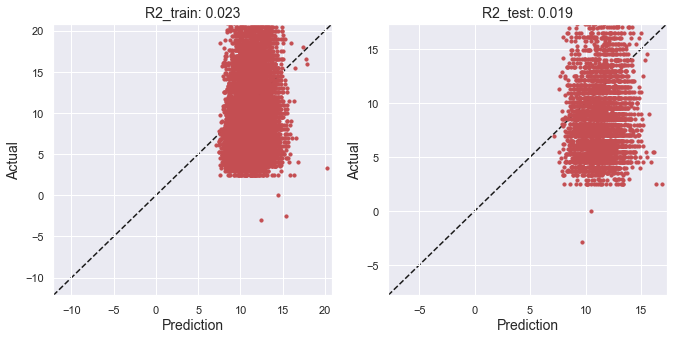

In [23]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

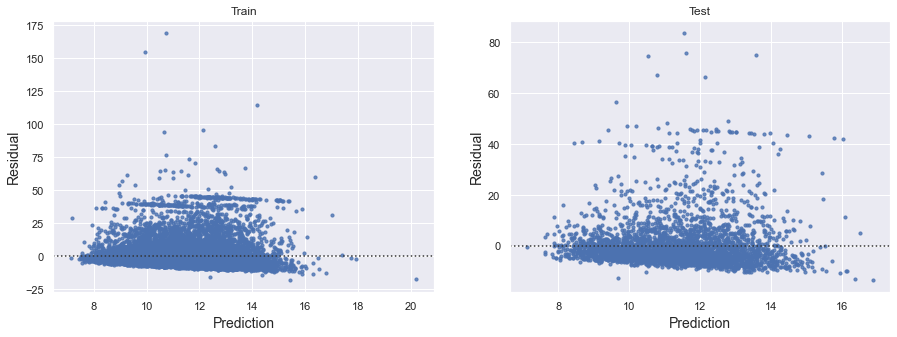

In [24]:
plot_residual(X_train, y_train, X_test, y_test, model)

Data kita memiliki masalah unbalanced 

## Transform Data

In [25]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, transform='yeo-johnson', scaling='standard'), ['passenger_count','year','distance']),
    ('categoric', cat_pipe(encoder='onehot'), ['month','day','hour']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])



model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=10, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.4s finished


{'algo__fit_intercept': False, 'prep__numeric__poly__degree': 3, 'prep__numeric__poly__interaction_only': False}
0.720797357249425 0.7225130488268232 0.747245632075499


Skor test kita naik drastis 0.74, berarti residual plot tidak berbohong.